In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
suicide_data = pd.read_csv("suicide.csv")

In [4]:
year_list = []
for i in suicide_data.year:
    if year_list.count(i) == 0:
        year_list.append(i)
year_list.sort()
#1985 - 2016

In [5]:
drop = ['generation','suicides/100k pop','country-year']
suicide_data = suicide_data.drop(drop, axis = 1)
suicide_data = suicide_data.rename(columns = {'suicides_no':'suicides','HDI for year': 'HDI_for_year',' gdp_for_year ($) ': 'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

## Suicide data compared with year, age, HDI, gdp

In [6]:
# compared with year
temp = suicide_data[['year','suicides']]
per_year = []
for i in range(32):
    per_year.append(0)
for i in range(27820):
    per_year[suicide_data['year'][i]-1987]+=suicide_data['suicides'][i]
num_suicides = pd.Series(per_year,name='suicides')
year_s = pd.Series(year_list,name='year')
suicide_year= pd.concat([year_s,num_suicides],axis=1)
suicide_year=suicide_year.set_index('year')

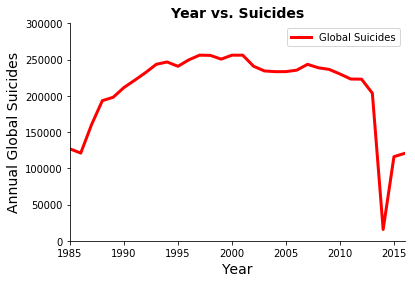

In [12]:
fig, ax = plt.subplots()

suicide_year.suicides.plot(ax = ax, color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("Year vs. Suicides", fontsize = 14, fontweight = "bold") # Sets the title
ax.set_ylabel("Annual Global Suicides", fontsize = 14,) # The ylable
ax.set_xlabel("Year", fontsize = 14,) # the xlable

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["Global Suicides"],frameon=True) # The legend, without a box...

ax.set_ylim(0,300000)
ax.set_xlim(1985,2016) 

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

In [39]:
# compared with age
temp = suicide_data[['age','suicides']]
suicide_age = [0,0,0,0,0]
for i in range(27820):
    if suicide_data['age'][i] == '5-14 years':
        suicide_age[0]+= suicide_data['suicides'][i]
    elif suicide_data['age'][i] == '15-24 years':
        suicide_age[1]+= suicide_data['suicides'][i]
    elif suicide_data['age'][i] == '35-54 years':
        suicide_age[2]+= suicide_data['suicides'][i]
    if suicide_data['age'][i] == '55-74 years':
        suicide_age[3]+= suicide_data['suicides'][i]
    else:
        suicide_age[4]+= suicide_data['suicides'][i]
        
sum_num = suicide_age[0]+suicide_age[1]+suicide_age[2]+suicide_age[3]+suicide_age[4]
suicide_age
percent_list = [] 
year_range = ['5-14 years','15-24 years','35-54 years', '55-74 years','75+ years']
for i in range(5):
    percent_list.append(suicide_age[i]/sum_num*100)

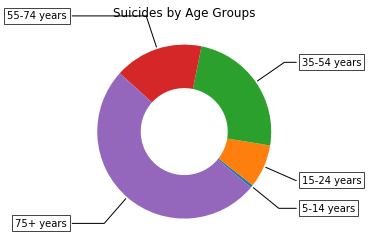

In [40]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

recipe = ['5-14 years','15-24 years','35-54 years', '55-74 years','75+ years']

wedges, texts = ax.pie(percent_list, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Suicides by Age Groups")

plt.show()